<a href="https://colab.research.google.com/github/praveenwork/ml/blob/main/Practice/ConvolutionalNuralNetworks_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras

class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, model, logs={}):
    if(logs.get("loss") < 0.2):
        print("Reached 99% accuracy")
        self.model.stop_training = True

callbacks = MyCallBack()

# Load Data set
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(training_images, traing_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

#Normalize data
training_images = training_images/255.0
test_images = test_images/255.0

#define Model

model = tf.keras.Sequential([
          
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

#Compile
model.compile(optimizer = 'adam', loss = tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

#fit
model.fit(training_images, traing_labels, epochs=5,callbacks= [callbacks])

test_loss = model.evaluate(test_images,test_labels)

model.summary()
print(test_loss)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6188 - accuracy: 0.7882
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3822 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8730
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params:

In [15]:
import tensorflow as tf
from tensorflow import keras

#Load Data
fMinistData = tf.keras.datasets.fashion_mnist
(trnImg, trnLbl), (tstImg, tstLbl) = fMinistData.load_data()

#Reshape data
trnImg = trnImg.reshape(60000,28,28, 1)
tstImg = tstImg.reshape(10000,28,28,1)

#Normalize Data
trnImg = trnImg/255.0
tstImg = tstImg/255.0

#Define model
model = tf.keras.Sequential([
           #Add first convolution
           tf.keras.layers.Conv2D(64, (3,3), activation= tf.nn.relu, input_shape = (28,28,1)),
           tf.keras.layers. MaxPooling2D(2,2),   

           #Add another Convolution
           tf.keras.layers.Conv2D(64, (3,3), activation= tf.nn.relu, input_shape=(28,28,1)),
           tf.keras.layers.MaxPooling2D(2,2),
          
           #Flatten
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(128, activation=tf.nn.relu),
           tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])


#compile model
model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#fit the model
model.fit(trnImg,trnLbl,epochs=10)

#evaluate
total_loss = model.evaluate(tstImg,tstLbl)

#summary
model.summary()
print("Loss:{}".format(total_loss))

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.6125 - accuracy: 0.7772
Epoch 2/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.3143 - accuracy: 0.8836
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2603 - accuracy: 0.9040
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2175 - accuracy: 0.9188
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1947 - accuracy: 0.9278
Epoch 6/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1640 - accuracy: 0.9393
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1427 - accuracy: 0.9461
Epoch 8/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1209 - accuracy: 0.9541
Epoch 9/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1095 - accuracy: 0.9595
Epoch 10/10
313/313 [==============================] - 4s 13ms/s

In [3]:
import tensorflow as tf
from tensorflow import keras

fmisitData = tf.keras.datasets.fashion_mnist
(iImages, iLabels), (tImages, tLabels) = fmisitData.load_data()

iImages = iImages.reshape(60000,28,28,1)
iImages = iImages/255.0

tImages = tImages.reshape(10000,28,28,1)
tImages = tImages/255.0

#dedine model

model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation= tf.nn.relu, input_shape = (28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation= tf.nn.relu, input_shape = (28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation= tf.nn.relu),
            tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

model.compile(optimizer = "adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model.fit(iImages,iLabels, epochs = 5)

model.evaluate(tImages,tLabels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.6059 - accuracy: 0.7813
Epoch 2/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.3076 - accuracy: 0.8880
Epoch 3/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2496 - accuracy: 0.9075
Epoch 4/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2186 - accuracy: 0.9181
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.2486 - accuracy: 0.9086


[0.24857772886753082, 0.9085999727249146]

In [31]:
tLabels[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

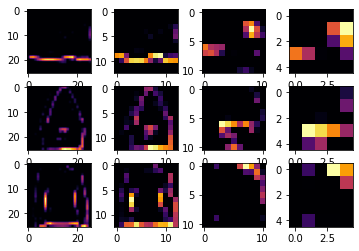

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

f,axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 31
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 32

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1  = activation_model.predict(tImages[FIRST_IMAGE].reshape(1, 28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(tImages[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(tImages[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#load data
fmData = tf.keras.datasets.fashion_mnist
(learnImages,learnLabels), (verifyImages, verifyLabels) = fmData.load_data()

learnImages = learnImages.reshape(60000, 28, 28, 1)
learnImages = learnImages/255.0

verifyImages = verifyImages.reshape(10000, 28, 28, 1)
verifyImages = verifyImages/255.0

model = tf.keras.Sequential([
           tf.keras.layers.Conv2D(32, (3,3), activation= tf.nn.relu, input_shape = (28,28,1)),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(128, activation=tf.nn.relu),
           tf.keras.layers.Dense(10, activation= tf.nn.softmax)              
])

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(learnImages, learnLabels, epochs=10)
total_loss, total_accuracy = model.evaluate(verifyImages,verifyLabels)

print(total_accuracy)




Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.5250 - accuracy: 0.8134
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2764 - accuracy: 0.9006
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2257 - accuracy: 0.9182
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1886 - accuracy: 0.9308
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1574 - accuracy: 0.9421
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1313 - accuracy: 0.9514
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1135 - accuracy: 0.9599
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0933 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0772 - accuracy: 0.9722
Epoch 10/10
313/313 [==============================] - 3s 8ms/st

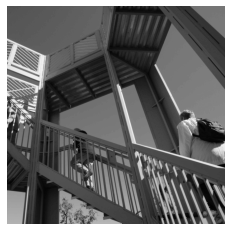

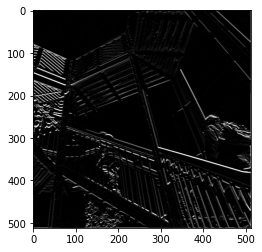

(512, 512)


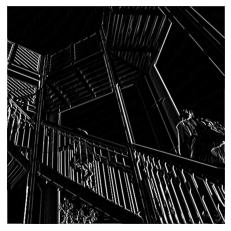

In [69]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

i = misc.ascent() 
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

#verifical Eding
filter = [[1,0,-1],[1,0,-1],[1,0,-1]]

weight = 1

for x in range(1, size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (i[x-1,y-1] * filter[0][0])
    convolution = convolution + (i[x,y-1] * filter[0][1])
    convolution = convolution + (i[x+1,y-1] * filter[0][2])
    convolution = convolution + (i[x-1,y] * filter[1][0])
    convolution = convolution + (i[x,y] * filter[1][1])
    convolution = convolution + (i[x+1,y] * filter[1][2])
    convolution = convolution + (i[x-1,y+1] * filter[2][0])
    convolution = convolution + (i[x,y+1] * filter[2][1])
    convolution = convolution + (i[x+1,y+1] * filter[2][2])
    convolution = convolution * weight
    if(convolution < 0):
      convolution = 0
    if(convolution > 255):
      convolution = 255
    i_transformed[x,y] = convolution

plt.imshow(i_transformed)
plt.show()
h_transformed = np.copy(i)

#Horizontal
#horizontal_filter = [[1,1,1],[0,0,0],[-1,-1,-1]]

horizontal_filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
for x in range(1, size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (i[x-1,y-1] * horizontal_filter[0][0])
    convolution = convolution + (i[x,y-1] * horizontal_filter[0][1])
    convolution = convolution + (i[x+1,y-1] * horizontal_filter[0][2])
    convolution = convolution + (i[x-1,y] * horizontal_filter[1][0])
    convolution = convolution + (i[x,y] * horizontal_filter[1][1])
    convolution = convolution + (i[x+1,y] * horizontal_filter[1][2])
    convolution = convolution + (i[x-1,y+1] * horizontal_filter[2][0])
    convolution = convolution + (i[x,y+1] * horizontal_filter[2][1])
    convolution = convolution + (i[x+1,y+1] * horizontal_filter[2][2])
    convolution = convolution * weight
    if(convolution < 0):
      convolution = 0
    if(convolution > 255):
      convolution = 255
    h_transformed[x,y] = convolution
plt.axis('off')
plt.imshow(h_transformed)
print(h_transformed.shape)
plt.show()

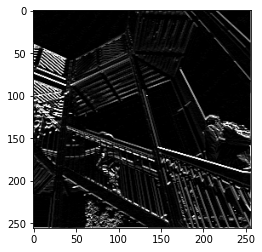

In [77]:
#pooling

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x,new_y))

for x in range(0,int(size_x), 2):
  for y in range(0,int(size_y),2):
    pixel = []
    pixel.append(i_transformed[x,y])
    pixel.append(i_transformed[x+1,y])
    pixel.append(i_transformed[x,y+1])
    pixel.append(i_transformed[x+1,y+1])
    newImage[int(x/2),int(y/2)] = max(pixel)

plt.imshow(newImage)


